Python Machine Learning 3rd edition by Sebastian Raschka and Vahid Mirjalili
https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch04/ch04.ipynb

<h2>Partitioning a Dataset into Training and Test Sets</h2

In [4]:
import pandas as pd
import numpy as np

In [7]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class Labels', np.unique(df_wine['Class label']))
df_wine.head()

Class Labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
from  sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.3, 
                                                     # 30% to test dataset
                                                     random_state=0,
                                                     stratify=y)

<h3>Bringing Features onto the Same Scale</h3>

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

Standardization (centers feature columns at mean 0 with standard deviation 1) may be more useful than normalization (rescaling features to a range of [0, 1]), especially for linear classifiers which initialize weights to 0 or small values close to 0, also because it maintains useful information about outliers

In [14]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

Another option is the RobustScaler, which is good for small test datasets with many outliers

High model performance on training data but lower performance on test data indicates overfitting (high model variance = model does not generalize well to new data). Common solutions to reduce generalization error:
* collect more training data
* introduce a penalty for complexity via regularization
* choose a simpler model with fewer parameters
* reduce the dimensionality of the data

<h2>Selecting Meaningful Features</h2>

<h3>Regularization</h3>

Regularization adds a penalty term to the cost function to encourage smaller weights, which decreases the model dependence on the training data. The goal is to minimize the sum of the unpenalized cost plus the penalty term, which can be understood as adding bias and preferring a simpler model to reduce the variance in the absence of sufficient training data to fit the model.

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')
# C=1.0 is default, but can be increased or decreased to make regularization
# stronger or weaker
lr.fit(X_train_std, y_train)
print(f'Training accuracy: {lr.score(X_train_std, y_train)}') # 100%
print(f'Test accuracy: {lr.score(X_test_std, y_test)}') # 100%

Training accuracy: 1.0
Test accuracy: 1.0


/opt/anaconda3/envs/drone-methane-venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In scikit-learn, the <code>intercept_</code> corresponds to w<sub>0</sub> and <code>coef_</code> corresponds to the values w<sub>j</sub> for j > 0

In [17]:
lr.intercept_

array([-1.26366585, -1.21585782, -2.37012932])

In [18]:
lr.coef_

array([[ 1.24558944,  0.18052817,  0.74620952, -1.16409344,  0.        ,
         0.        ,  1.15784716,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55985036,  2.50866652],
       [-1.53783436, -0.38669798, -0.99545885,  0.36456599, -0.05918461,
         0.        ,  0.66779925,  0.        ,  0.        , -1.93339371,
         1.23520582,  0.        , -2.23214215],
       [ 0.13559736,  0.16870319,  0.35740726,  0.        ,  0.        ,
         0.        , -2.43697873,  0.        ,  0.        ,  1.56330148,
        -0.81937889, -0.49330956,  0.        ]])

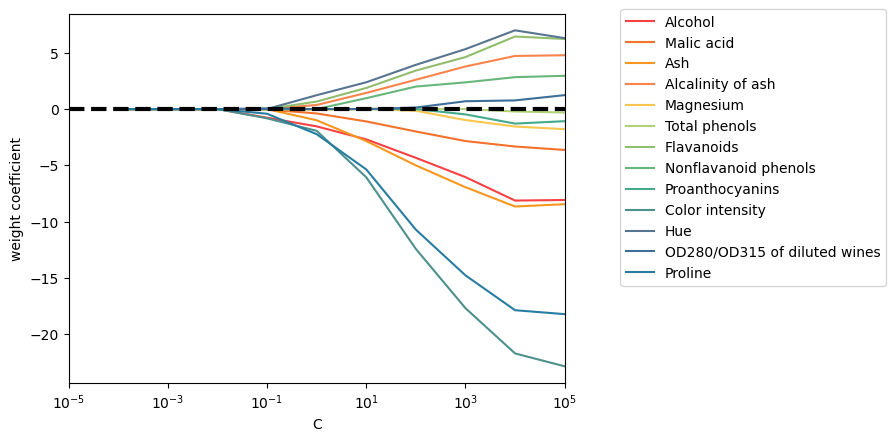

In [27]:
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

fig = plt.figure()
ax = plt.subplot(111)

colors = [
    "#f94144",
    "#f3722c",
    "#f8961e",
    "#f9844a",
    "#f9c74f",
    "#b2d279",
    "#90be6d",
    "#67b77c",
    "#43aa8b",
    "#4d908e",
    "#577590",
    "#3c6f9a",
    "#277da1"
]

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, 
                                                solver='liblinear',
                                                random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

All feature weights will be zero if we penalize the model with a strong regularization parameter (C < 0.01); C is the inverse of the regularization parameter, $ \lambda $

<h2>Sequential Feature Selection Algorithms</h2>

In [29]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, 
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = estimator
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

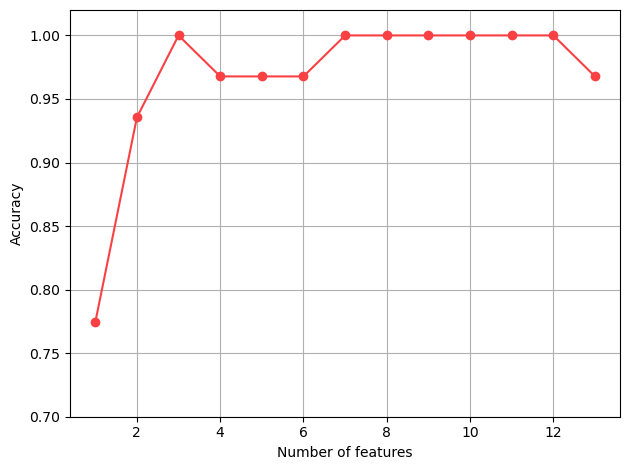

In [32]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o', color=colors[0])
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()

plt.show()

In [33]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [36]:
knn.fit(X_train_std, y_train)
print(f'Training accuracy: {knn.score(X_train_std, y_train)}')
print(f'Test accuracy: {knn.score(X_test_std, y_test)}')

Training accuracy: 0.967741935483871
Test accuracy: 0.9814814814814815


The KNN classifier that was trained on the entire dataset generalizes well to new data (98% accuracy). Let's compare that to the performance of the selected three-feature subset:

In [37]:
knn.fit(X_train_std[:, k3], y_train)
print(f'Training accuracy: {knn.score(X_train_std[:, k3], y_train)}')
print(f'Test accuracy: {knn.score(X_test_std[:, k3], y_test)}')

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


Substantially reducing the size and complexity of the dataset cost only a slight decrease in performance

<h2>Assessing Feature Importance with Random Forests</h2>

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


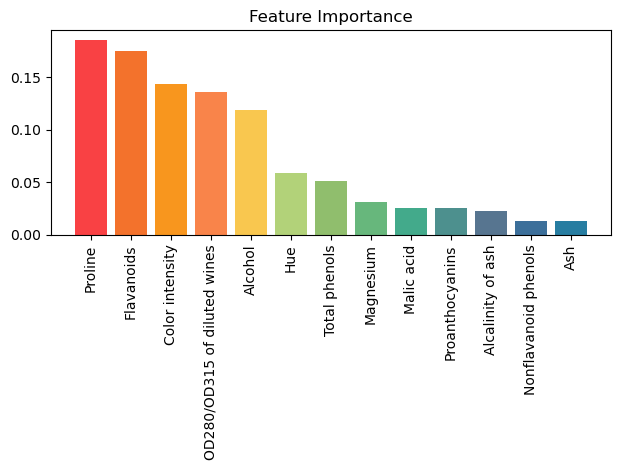

In [40]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center',
        color=colors)

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()

<h3>Reduce dataset</h3>

In [42]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print(f'Number of features that meet this threshold criterion {X_selected.shape[1]}')

Number of features that meet this threshold criterion 5


Now, let's print the 3 features that met the threshold criterion for feature selection that we set earlier 

In [43]:
for f in range(X_selected.shape[1]):
    print('%2d) %-*s %f' % (f +1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
